In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json

In [ ]:
'''with open('../../data/processed/WESAD/feature_extracted/30s/Synthetic-Focus-Data-Subjects.json', 'r') as f:
    data = json.load(f)'''

In [ ]:
df = pd.read_csv('../../data/processed/WESAD/feature_extracted/30s/data_with_focus.csv', index_col=0)

In [ ]:
df

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,46.964000,-8.760000,-7.498667,63.226677,2.985640,1.290620,0.053588,0.000966,23.230088,1.451065,81.961468,774.259868,238.947514,170.587935,70.270270,4.036088,2,15,0
1071,33.698667,3.725333,49.853333,62.980308,2.770939,1.290599,0.020151,-0.000114,25.608455,2.211387,101.350382,641.304348,252.891267,181.866120,88.888889,1.921900,2,15,0
1072,31.114000,4.294000,52.504667,62.972961,2.406421,1.332025,0.031676,0.000495,24.847170,1.932891,90.927874,699.776786,207.303412,159.144898,68.292683,1.107406,2,15,0
1073,28.826667,-17.737333,17.747333,63.635677,6.112821,1.373313,0.023374,0.000278,24.011434,1.701185,98.456919,655.539773,282.197210,195.836075,74.418605,15.788516,2,15,0


In [ ]:
#df_2 = pd.read_csv('../../data/processed/WESAD/feature_extracted/30s/Simulated_Focus_Data__18_52__cleaned_lfhf.csv')

In [ ]:
#cols = [col for col in df_1.columns if col != 'focus_label'] + ['focus_label']

In [ ]:
#df_2 = df_2[cols]
#df_2

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,0.542560,-0.463418,-0.465730,63.693570,0.308672,1.658448,0.313808,-0.010128,26.140334,1.892121,84.658963,674.542175,141.847010,141.921897,54.824851,2.496598,2,18,0
1,0.110923,-1.150994,0.375698,63.019489,0.470831,1.414609,0.237953,-0.000135,23.728746,2.265178,80.041883,725.580284,163.177541,164.943326,63.068070,1.977521,3,18,0
2,0.171368,-0.115648,-0.301104,62.317182,0.428016,0.921662,0.080002,0.003436,18.517148,2.915332,66.713406,898.114201,226.034273,206.739254,74.536908,0.500000,4,18,1
3,-0.309212,0.331263,0.975545,63.116661,0.481434,1.089378,0.107469,0.008125,22.452932,2.375722,74.490637,823.664351,189.750293,183.391234,70.750420,0.996693,1,18,1
4,1.564644,-2.619745,0.821903,63.569638,0.470099,1.149282,0.099555,-0.002197,22.153193,2.530713,71.447030,837.111063,190.467106,186.161267,68.331850,1.778534,1,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,0.434435,-1.180916,1.546109,63.618417,0.597926,1.472772,0.199376,0.001819,23.920840,1.499594,83.186403,760.707310,131.108393,150.341837,48.433075,2.231972,3,52,0
2446,-1.338693,-0.066946,-0.187012,62.642205,0.587866,1.720254,0.277256,-0.008247,25.926898,1.234510,86.921731,695.837617,113.899323,121.327145,43.060233,3.371828,2,52,0
2447,0.490648,0.200864,-0.174208,63.290337,0.617119,1.703250,0.292064,0.001821,25.927494,1.258146,84.885149,700.136589,103.613951,123.408556,42.884753,2.662518,2,52,0
2448,-1.286694,0.559477,-0.267176,64.763096,0.570481,1.129068,0.090849,0.004051,22.340336,1.650436,71.116576,848.693267,147.775310,166.690005,51.418006,1.517052,1,52,1


In [ ]:
#df = pd.concat([df_1, df_2], axis=0)

In [8]:
df

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,37.715333,-35.027333,-9.694000,62.840001,5.214880,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8,1
1,39.252000,-47.664667,7.822000,62.549339,0.544205,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8,1
2,39.628667,-46.246667,9.764000,62.469299,1.120992,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8,1
3,38.927333,-48.439333,6.083333,62.442314,0.428267,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8,1
4,38.919333,-47.006667,-0.914667,62.576766,1.166077,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,0.434435,-1.180916,1.546109,63.618417,0.597926,1.472772,0.199376,0.001819,23.920840,1.499594,83.186403,760.707310,131.108393,150.341837,48.433075,2.231972,3,52,0
2446,-1.338693,-0.066946,-0.187012,62.642205,0.587866,1.720254,0.277256,-0.008247,25.926898,1.234510,86.921731,695.837617,113.899323,121.327145,43.060233,3.371828,2,52,0
2447,0.490648,0.200864,-0.174208,63.290337,0.617119,1.703250,0.292064,0.001821,25.927494,1.258146,84.885149,700.136589,103.613951,123.408556,42.884753,2.662518,2,52,0
2448,-1.286694,0.559477,-0.267176,64.763096,0.570481,1.129068,0.090849,0.004051,22.340336,1.650436,71.116576,848.693267,147.775310,166.690005,51.418006,1.517052,1,52,1


In [5]:
df.head()

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,focus_label,subject
0,-28.71,-6.04,-27.21,58.75,1.68,1.84,0.055,-0.0004,23.0,1.58,95,629,42.7,44.8,12.8,0.79,1,0,1
1,-33.44,-5.67,-23.74,55.09,1.77,1.83,0.075,-0.0006,25.7,0.94,91,659,40.2,28.9,15.4,1.41,1,0,1
2,-35.87,1.67,-21.38,57.72,3.36,2.08,0.034,0.0002,22.7,3.03,91,656,26.0,24.2,21.8,0.39,1,1,1
3,-25.07,-7.20,-20.27,55.33,3.38,1.88,0.017,-0.0004,23.0,3.80,94,638,42.4,40.4,21.9,1.25,1,1,1
4,-30.52,3.88,-29.94,60.35,1.62,1.97,0.020,-0.0001,22.7,3.07,96,624,20.9,22.4,14.5,1.27,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACC_x_mean       700 non-null    float64
 1   ACC_y_mean       700 non-null    float64
 2   ACC_z_mean       700 non-null    float64
 3   net_acc_mean     700 non-null    float64
 4   net_acc_std      700 non-null    float64
 5   EDA_mean         700 non-null    float64
 6   EDA_std          700 non-null    float64
 7   EDA_slope        700 non-null    float64
 8   RESP_rate        700 non-null    float64
 9   RESP_regularity  700 non-null    float64
 10  HR               700 non-null    int64  
 11  IBI              700 non-null    int64  
 12  RMSSD            700 non-null    float64
 13  SDNN             700 non-null    float64
 14  pNN50            700 non-null    float64
 15  lf/hf            700 non-null    float64
 16  label            700 non-null    int64  
 17  focus_label     

## Outlier detection

In [7]:
features = ['HR', 'EDA_mean', 'RMSSD', 'RESP_rate', 'net_acc_mean']

In [8]:
mask = pd.Series(True, index=df.index)

In [9]:
for subject in df['subject'].unique():
    for label in df['label'].unique():
        sub_df = df[(df['subject'] == subject) & (df['label'] == label)]
        for feature in features:
            q1 = sub_df[feature].quantile(0.25)
            q3 = sub_df[feature].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outlier_mask = (df['subject'] == subject) & (df['focus_label'] == label) & (
                (df[feature] < lower) | (df[feature] > upper))
            mask[outlier_mask] = False


In [10]:
df = df[mask].reset_index(drop=True)

In [11]:
df

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,focus_label,subject
0,-28.71,-6.04,-27.21,58.75,1.68,1.84,0.055,-0.0004,23.0,1.58,95,629,42.7,44.8,12.8,0.79,1,0,1
1,-33.44,-5.67,-23.74,55.09,1.77,1.83,0.075,-0.0006,25.7,0.94,91,659,40.2,28.9,15.4,1.41,1,0,1
2,-35.87,1.67,-21.38,57.72,3.36,2.08,0.034,0.0002,22.7,3.03,91,656,26.0,24.2,21.8,0.39,1,1,1
3,-25.07,-7.20,-20.27,55.33,3.38,1.88,0.017,-0.0004,23.0,3.80,94,638,42.4,40.4,21.9,1.25,1,1,1
4,-30.52,3.88,-29.94,60.35,1.62,1.97,0.020,-0.0001,22.7,3.07,96,624,20.9,22.4,14.5,1.27,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,-23.50,0.55,-30.22,61.07,1.88,0.27,0.028,-0.0002,16.6,2.10,66,908,59.0,41.7,11.7,1.32,4,1,10
530,-18.05,-9.97,-25.28,61.49,4.05,0.33,0.151,-0.0006,17.1,0.51,67,891,42.5,35.2,20.1,1.02,4,0,10
531,-27.25,-2.19,-31.43,61.87,2.03,0.63,0.011,0.0007,15.2,3.45,68,887,45.0,54.0,20.3,1.65,4,1,10
532,-34.47,-16.94,-29.85,57.42,3.17,0.20,0.040,-0.0003,15.5,3.74,69,864,51.1,56.9,33.1,0.94,4,1,10


## Univariate analysis

In [12]:
features = ['HR', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'EDA_mean', 'RESP_rate', 'net_acc_mean']

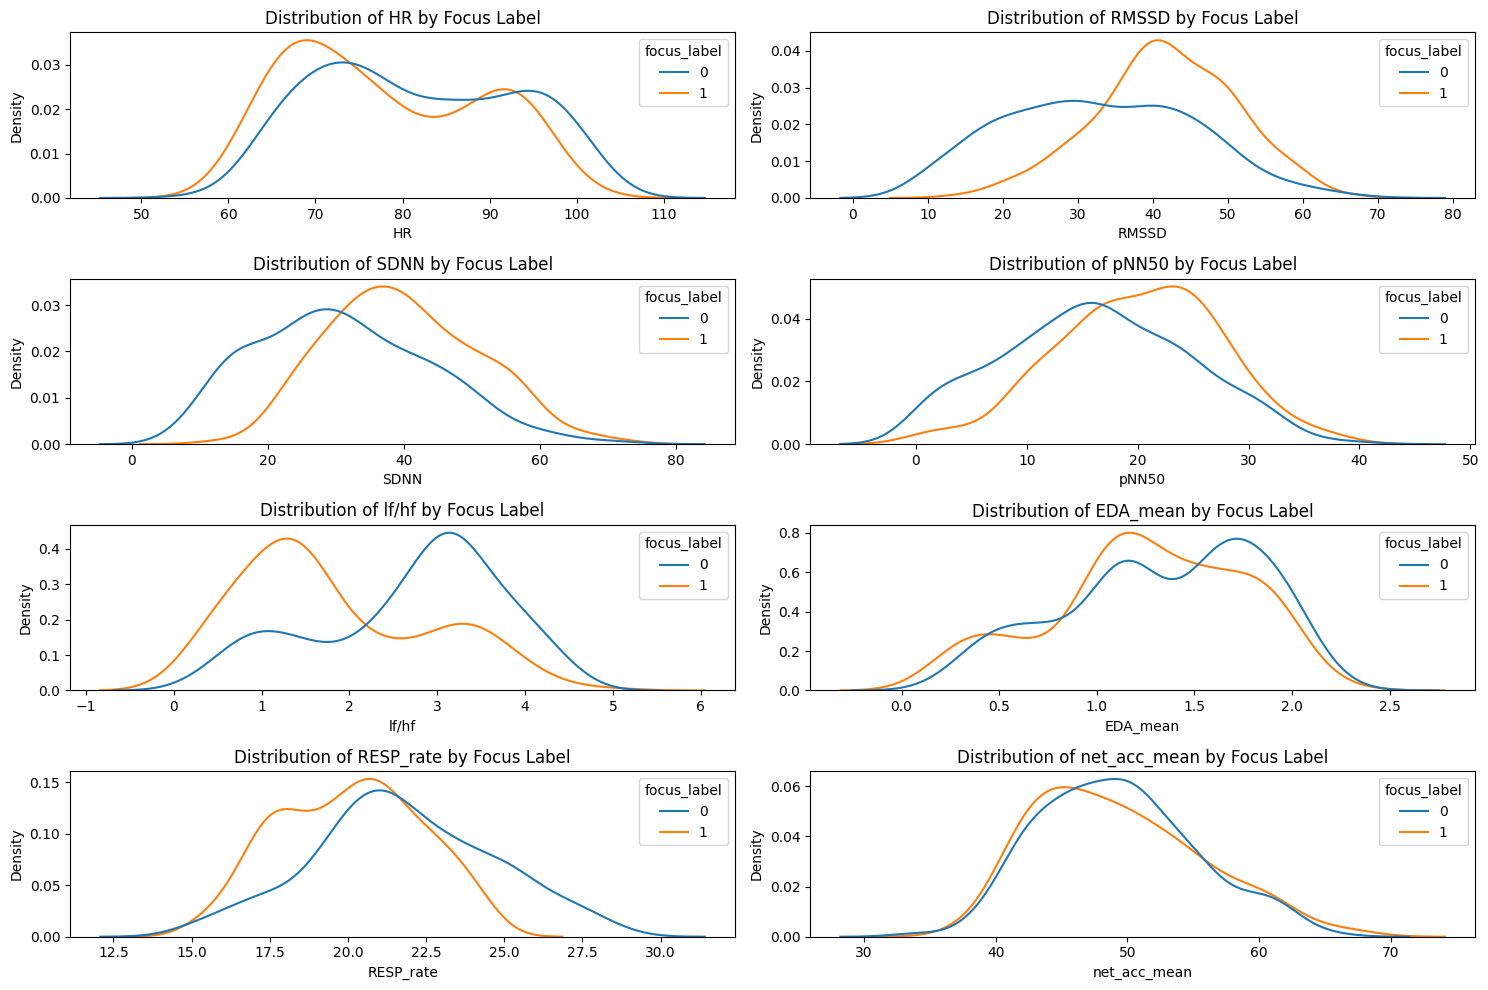

In [13]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x=feature, hue='focus_label', common_norm=False)
    plt.title(f'Distribution of {feature} by Focus Label')
plt.tight_layout()
plt.show()

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['focus_label', 'label', 'subject'])
corr = numeric_cols.corr()

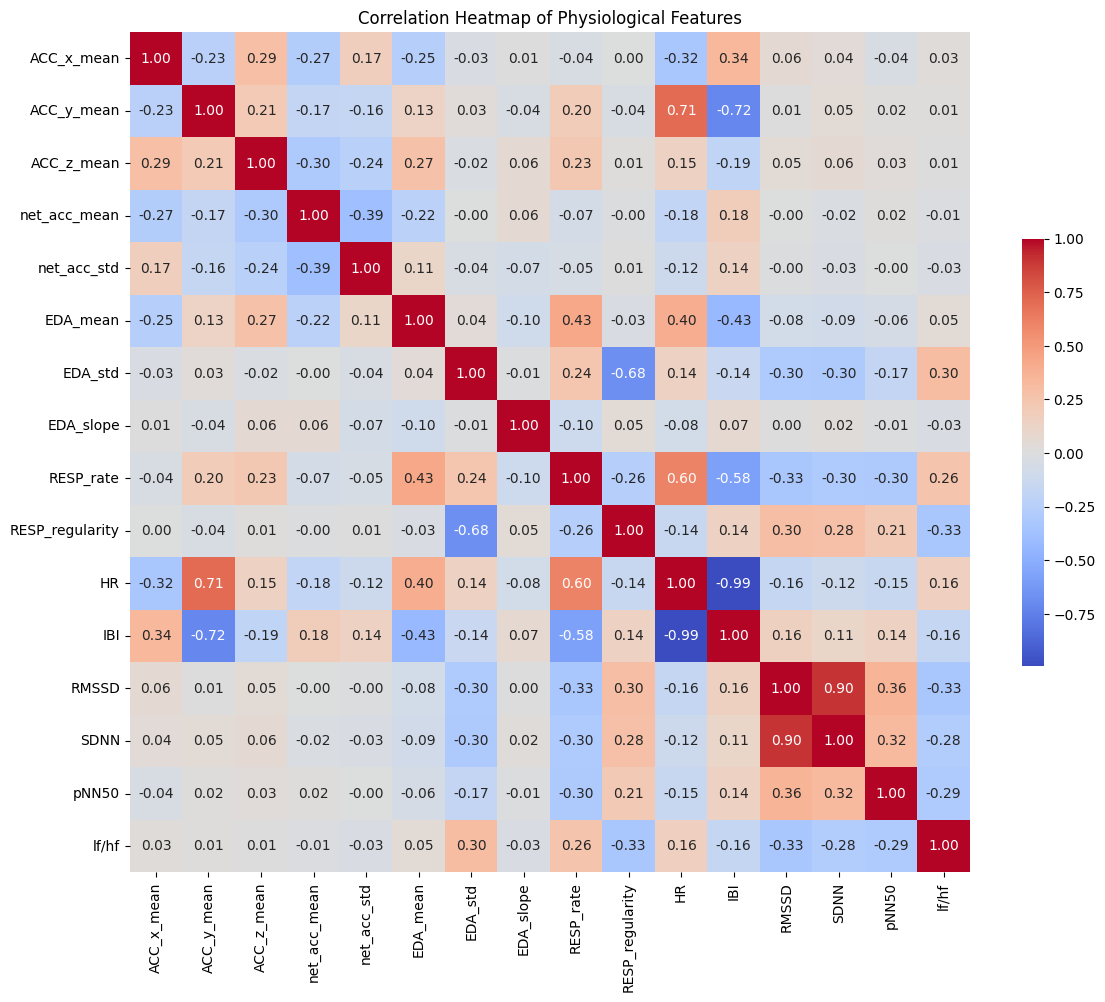

In [15]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.5})
plt.title("Correlation Heatmap of Physiological Features")
plt.tight_layout()
plt.show()

In [20]:
feature_pairs = [
    ('HR', 'EDA_mean'),
    ('HR', 'RMSSD'),
    ('RMSSD', 'RESP_rate'),
    ('net_acc_mean', 'HR')
]

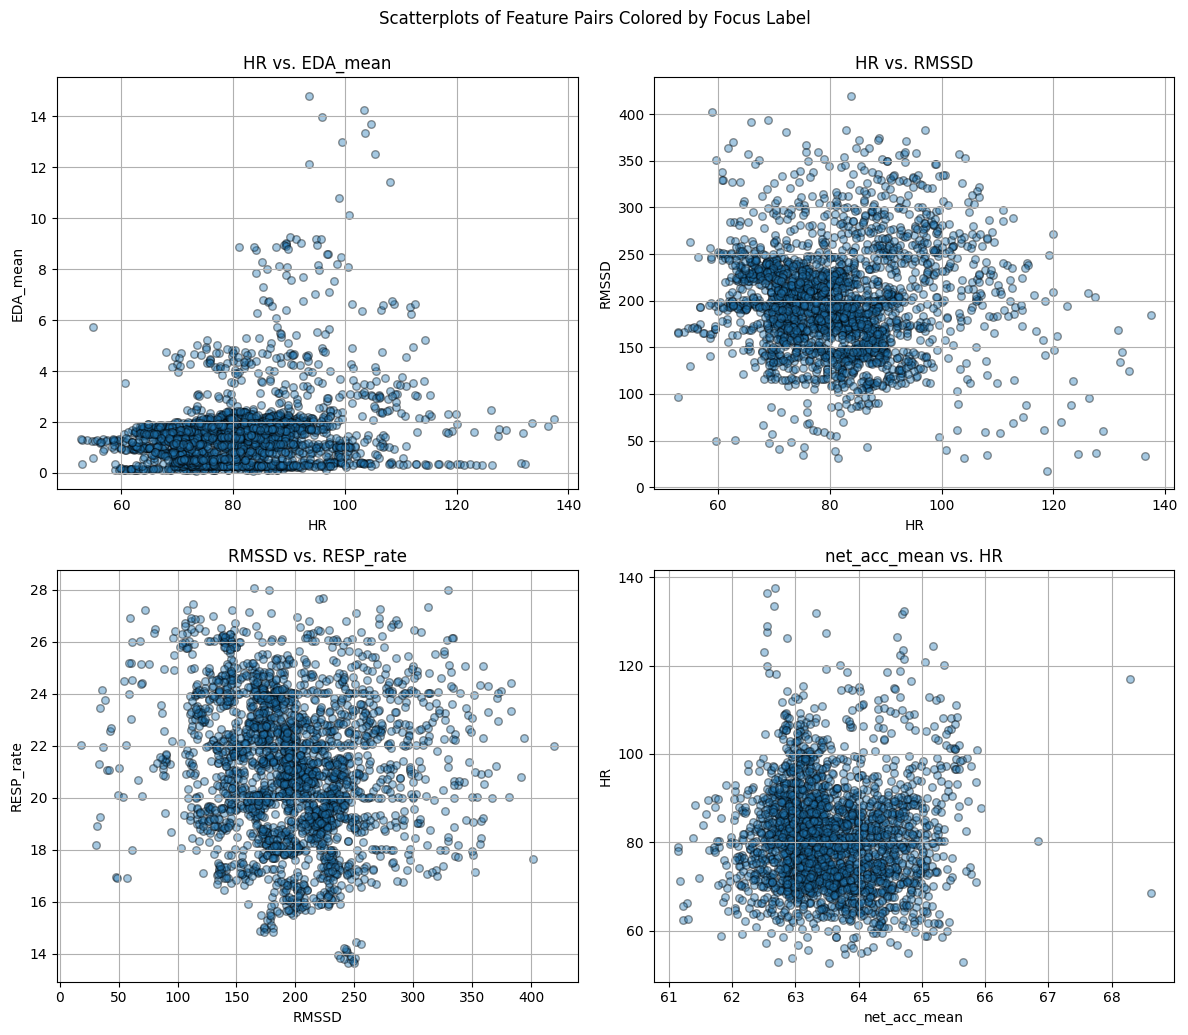

In [21]:
plt.figure(figsize=(12, 10))
for i, (f1, f2) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[f1], df[f2], alpha=0.4, edgecolor='k', s=30)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'{f1} vs. {f2}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Scatterplots of Feature Pairs Colored by Focus Label", y=1.03)
plt.show()

## Class imbalance check

In [22]:
df.value_counts('focus_label')

focus_label
0    1417
1    1103
Name: count, dtype: int64

## Feature-Label relationship

In [23]:
df.columns

Index(['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'label', 'subject',
       'focus_label'],
      dtype='object')

/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_53178/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_53178/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_53178/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/fo

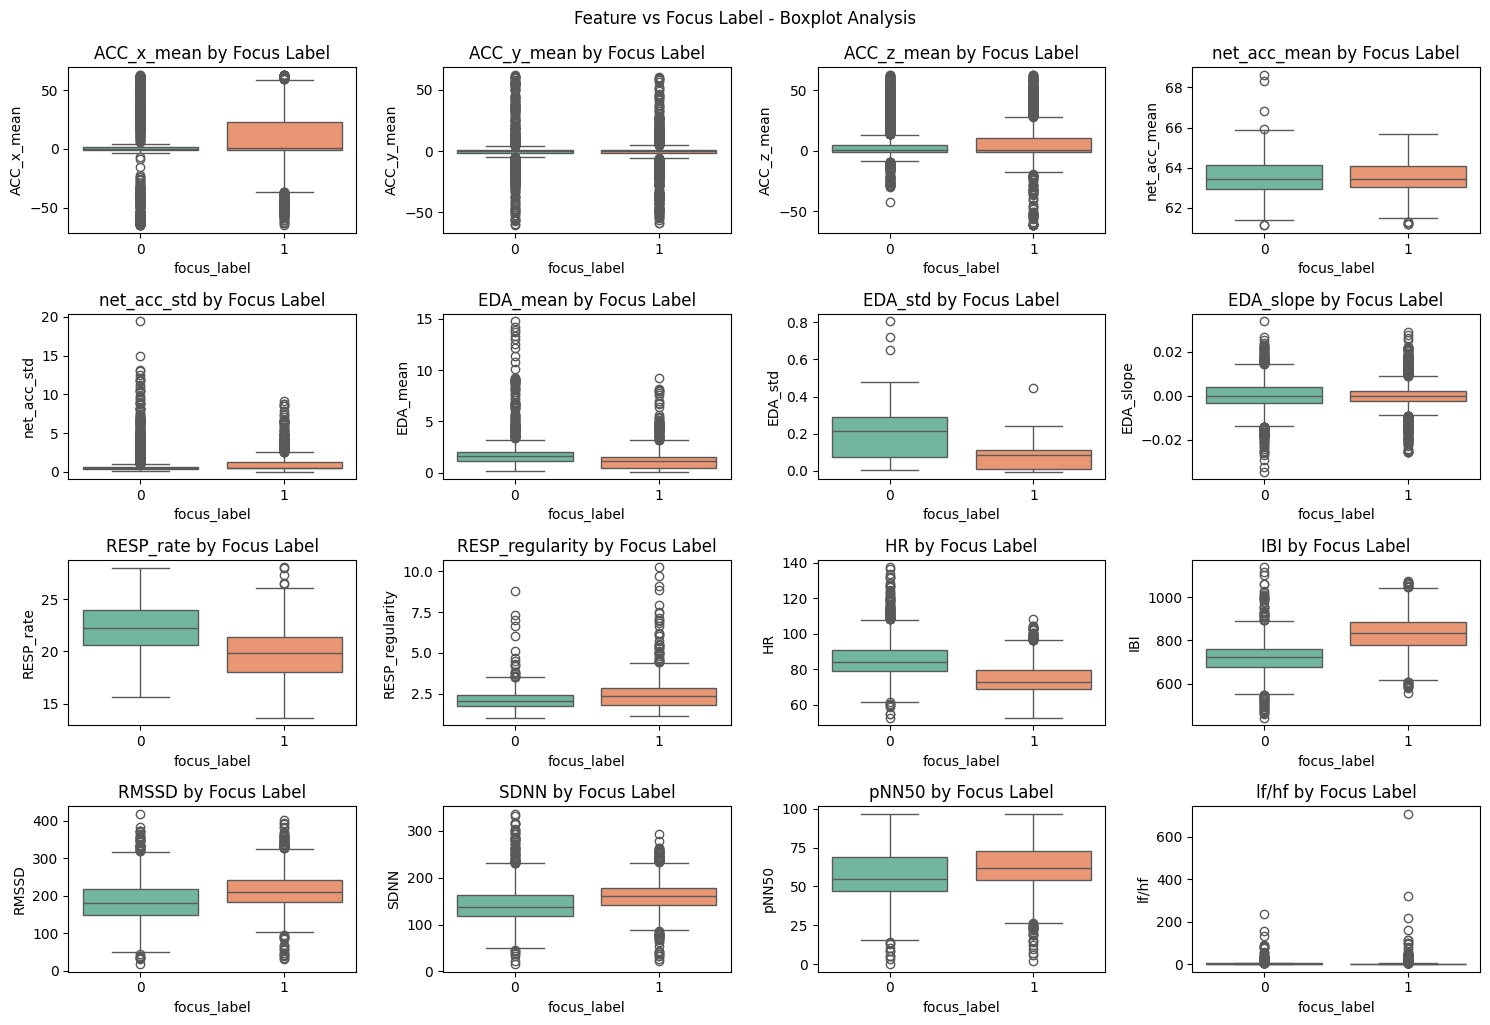

In [24]:
feature_list = ['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_list, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
    plt.title(f'{feature} by Focus Label')
plt.tight_layout()
plt.suptitle("Feature vs Focus Label - Boxplot Analysis", y=1.02)
plt.show()

In [25]:
df.to_csv('../../data/processed/WESAD/feature_extracted/30s/data_EDA.csv')